In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm
from scipy import linalg
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from src import utils_ald

In [2]:
data_full = pd.read_csv('data/data_full.csv')
data_full

,gender,medal,type,year,country,abb,longitude,latitude
0,Men,Gold,Archery,1980,Denmark,DEN,9.501785,56.263920
1,Men,Silver,Archery,1980,FR Germany,FRG,10.451526,51.165691
2,Men,Bronze,Archery,1980,Japan,JPN,138.252924,36.204824
3,Men,Gold,Archery,1980,FR Germany,FRG,10.451526,51.165691
4,Men,Silver,Archery,1980,Belgium,BEL,4.469936,50.503887
...,...,...,...,...,...,...,...,...
19440,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19441,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19442,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004
19443,Women,Bronze,Volleyball,2016,Brazil,BRA,-51.925280,-14.235004


In [3]:
data_full_drop = data_full.drop(columns=["gender","type","country","abb","year"])
data_full_drop

,medal,longitude,latitude
0,Gold,9.501785,56.263920
1,Silver,10.451526,51.165691
2,Bronze,138.252924,36.204824
3,Gold,10.451526,51.165691
4,Silver,4.469936,50.503887
...,...,...,...
19440,Bronze,-51.925280,-14.235004
19441,Bronze,-51.925280,-14.235004
19442,Bronze,-51.925280,-14.235004
19443,Bronze,-51.925280,-14.235004


In [4]:
type(data_full_drop.medal)

pandas.core.series.Series

In [5]:
models = [
(LinearDiscriminantAnalysis, "LDA"),
(QuadraticDiscriminantAnalysis, "QDA"),
(GaussianNB, "NB"),
]
def validation_errors(df, models,value):
    y = df[value]
    X = df.drop(columns=[value])
    for model, name in models:
        for acc in cross_val_score(model(), X, y, cv=10):
            yield name, acc
def add_decision_boundaries(df, models,value):
    colors = sns.color_palette()
    for model, name in models:
        y = df[value]
        X = df.drop(columns=[value])
        cls = model()
        cls.fit(X, y)
        utils_ald.add_decision_boundary(cls, label=name, color=colors.pop(), region=False)

C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


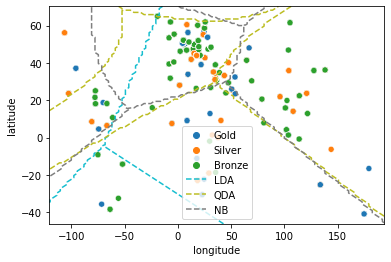

In [6]:
sns.scatterplot(x="longitude", y="latitude", data=data_full_drop, hue="medal")
add_decision_boundaries(data_full_drop, models, "medal")
plt.show()

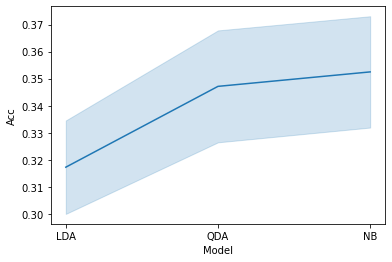

In [7]:
df = pd.DataFrame(validation_errors(data_full_drop, models,"medal"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

In [8]:
data_athletics = pd.read_csv('data/medal_country_year_athletics.csv')
data_athletics_drop = data_athletics.drop(columns=["country","year"])
data_athletics_drop

,longitude,latitude,value
0,9.501785,56.263920,S
1,10.451526,51.165691,G
2,-106.346771,56.130366,G
3,-102.552784,23.634501,G
4,25.748151,61.924110,S
...,...,...,...
1135,35.529562,-18.665695,B
1136,17.228331,26.335100,0
1137,121.774017,12.879721,0
1138,102.495496,19.856270,0


C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within th

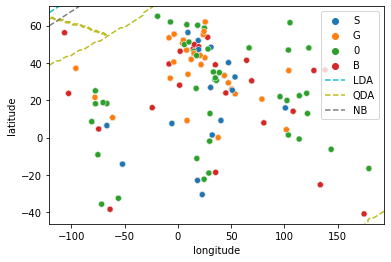

In [9]:
sns.scatterplot(x="longitude", y="latitude", data=data_athletics_drop, hue="value")
add_decision_boundaries(data_athletics_drop, models,"value")
plt.show()

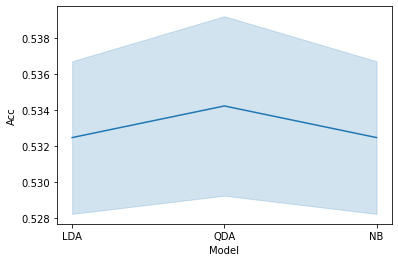

In [10]:
df = pd.DataFrame(validation_errors(data_athletics_drop, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()

In [11]:
data_swimming = pd.read_csv('data/medal_country_year_swimming.csv')
data_swimming_drop = data_swimming.drop(columns=["country","year"])
data_swimming_drop

,longitude,latitude,value
0,9.501785,56.263920,B
1,10.451526,51.165691,G
2,-106.346771,56.130366,G
3,-102.552784,23.634501,S
4,25.748151,61.924110,S
...,...,...,...
1135,35.529562,-18.665695,0
1136,17.228331,26.335100,0
1137,121.774017,12.879721,0
1138,102.495496,19.856270,0


C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\matplotlib\contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\matplotlib\contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Ho Xuan Vinh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(
C:\Users\Ho Xuan Vinh\Documents\UTC\SY09\Projet\src\utils_ald.py:61: UserWarning: No contour levels were found within the

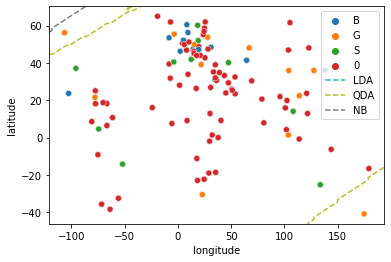

In [12]:
sns.scatterplot(x="longitude", y="latitude", data=data_swimming_drop, hue="value")
add_decision_boundaries(data_swimming_drop, models,"value")
plt.show()

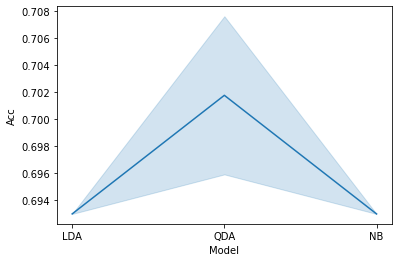

In [13]:
df = pd.DataFrame(validation_errors(data_swimming_drop, models,"value"), columns=["Model", "Acc"])
sns.lineplot(x="Model", y="Acc", data=df, ci="sd")
plt.show()